In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from ShieldRunProcessing import *

In [12]:
# Load CSV file (update the filename accordingly)
run1 = 'Data/Log104092025184240.csv'
run2 = 'Data/LOG204092025184240.csv'
run3 = 'Data/LOG304092025193841.csv'
run4 = 'Data/TCCOMP410292025182243.csv'
run5 = 'Data/TCCOMP510292025205116.csv'
run6 = 'Data/TCCOMP610292025153922.csv'

df1 = pd.read_csv(run1, skiprows=1)
df2 = pd.read_csv(run2, skiprows=1)
df3 = pd.read_csv(run3, skiprows=1)
df4 = pd.read_csv(run4, skiprows=1)
df5 = pd.read_csv(run5, skiprows=1)
df6 = pd.read_csv(run6, skiprows=1)

In [13]:
def seconds_to_mins(df):
    # Convert times to minutes since first timestamp
    first_time = datetime.combine(datetime.today(), df['Time'].iloc[0])
    time_minutes = df['Time'].apply(lambda t: (datetime.combine(datetime.today(), t) - first_time).total_seconds() / 60)
    return time_minutes

In [14]:
# Convert Time column to datetime.time objects
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.time
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.time
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S').dt.time
df4['Time'] = pd.to_datetime(df4['Time'], format='%H:%M:%S').dt.time
df5['Time'] = pd.to_datetime(df5['Time'], format='%H:%M:%S').dt.time
df6['Time'] = pd.to_datetime(df6['Time'], format='%H:%M:%S').dt.time

time_minutes1 = seconds_to_mins(df1)
time_minutes2 = seconds_to_mins(df2)
time_minutes3 = seconds_to_mins(df3)
time_minutes4 = seconds_to_mins(df4)
time_minutes5 = seconds_to_mins(df5)
time_minutes6 = seconds_to_mins(df6)


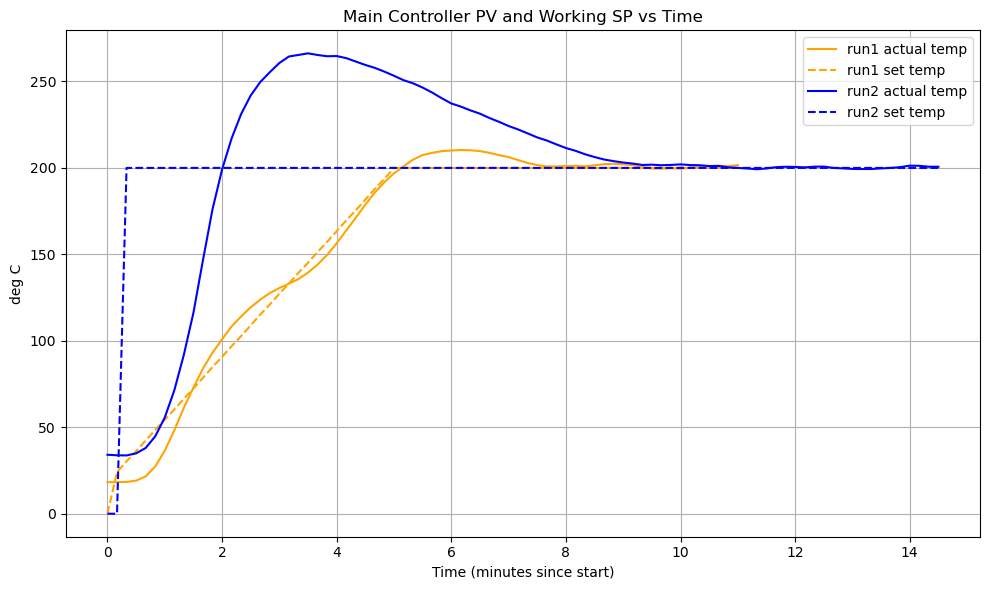

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes1, df1['Main_Controller_PV'],  color='orange', linestyle='-', label='run1 actual temp')
plt.plot(time_minutes1, df1['Main_Controller_Working_SP'],  color='orange', linestyle='--', label='run1 set temp')

plt.plot(time_minutes2, df2['Main_Controller_PV'], color='blue', linestyle='-', label='run2 actual temp')
plt.plot(time_minutes2, df2['Main_Controller_Working_SP'],  color='blue', linestyle='--', label='run2 set temp')

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

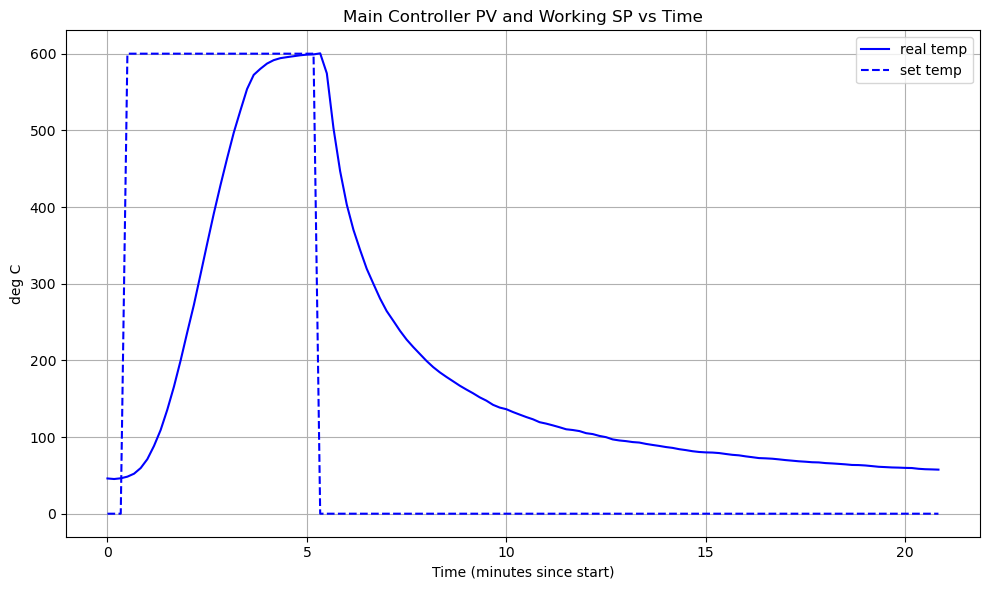

In [16]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes3, df3['Main_Controller_PV'], color='blue', linestyle='-', label='real temp')
plt.plot(time_minutes3, df3['Main_Controller_Working_SP'], color='blue', linestyle='--', label='set temp')

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:

data_path1 = '/Users/colinweaver/Documents/PTTEP/Results/10.29/run_7_14h33'
data_path2 = '/Users/colinweaver/Documents/PTTEP/Results/10.29/run_9_17h03'
data_path3 = '/Users/colinweaver/Documents/PTTEP/Results/10.29/run_5_11h49'

# Load data
t_TC4, df_TC4 = load_TC_data(data_path1 + "/thermocouple_data.csv")
t_TC5, df_TC5 = load_TC_data(data_path2 + "/thermocouple_data.csv")
t_TC6, df_TC6 = load_TC_data(data_path3 + "/thermocouple_data.csv")

TC_voltage_mV4 = df_TC4["type_K_thermocouple_Voltage_mV"].to_numpy(dtype=float)
TC_temp_C4 = voltage_to_temp_typeK(TC_voltage_mV4)

TC_voltage_mV5 = df_TC5["type_K_thermocouple_Voltage_mV"].to_numpy(dtype=float)
TC_temp_C5 = voltage_to_temp_typeK(TC_voltage_mV5)

TC_voltage_mV6 = df_TC6["type_K_thermocouple_Voltage_mV"].to_numpy(dtype=float)
TC_temp_C6 = voltage_to_temp_typeK(TC_voltage_mV6)

idx = np.searchsorted(t_TC4, time_minutes4.iloc[-1]*60, side='right')
t_TC4 = t_TC4[:idx]
TC_temp_C4 = TC_temp_C4[:idx]

idx = np.searchsorted(t_TC5, time_minutes5.iloc[-1]*60, side='right')
t_TC5 = t_TC5[:idx]
TC_temp_C5 = TC_temp_C5[:idx]

idx = np.searchsorted(t_TC6, time_minutes6.iloc[-1]*60, side='right')
t_TC6 = t_TC6[:idx]
TC_temp_C6 = TC_temp_C6[:idx]

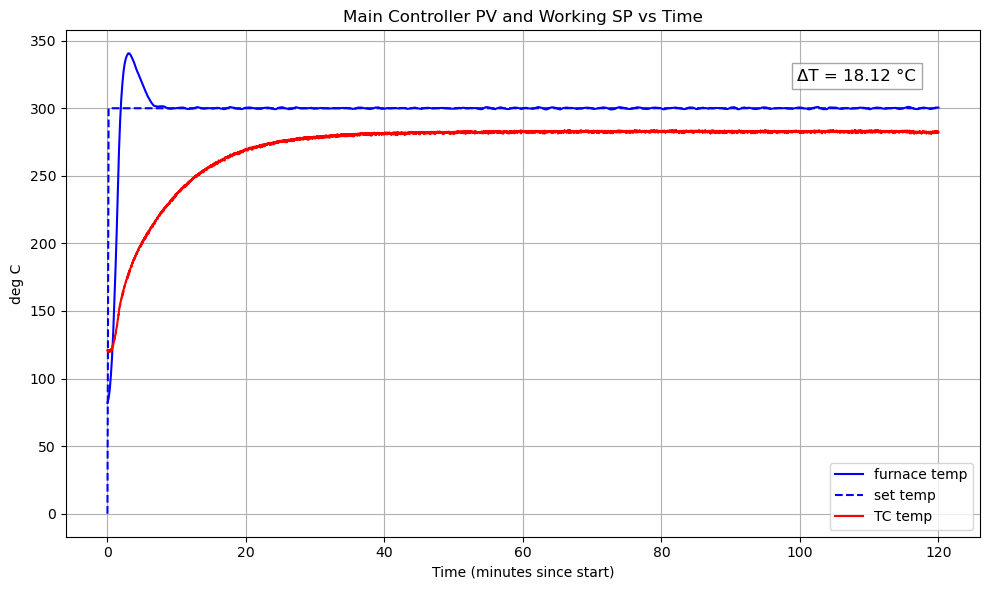

In [31]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes4, df4['Main_Controller_PV'], color='blue', linestyle='-', label='furnace temp')
plt.plot(time_minutes4, df4['Main_Controller_Working_SP'], color='blue', linestyle='--', label='set temp')
plt.plot(t_TC4/60, TC_temp_C4, color='red', linestyle='-', label='TC temp')

delta_T = abs(np.mean(TC_temp_C4[int(len(TC_temp_C4)/4):]) - df4['Main_Controller_PV'].iloc[-1])

plt.text(
    0.80, 0.9,
    f"ΔT = {delta_T:.2f} °C",
    transform=plt.gca().transAxes,
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

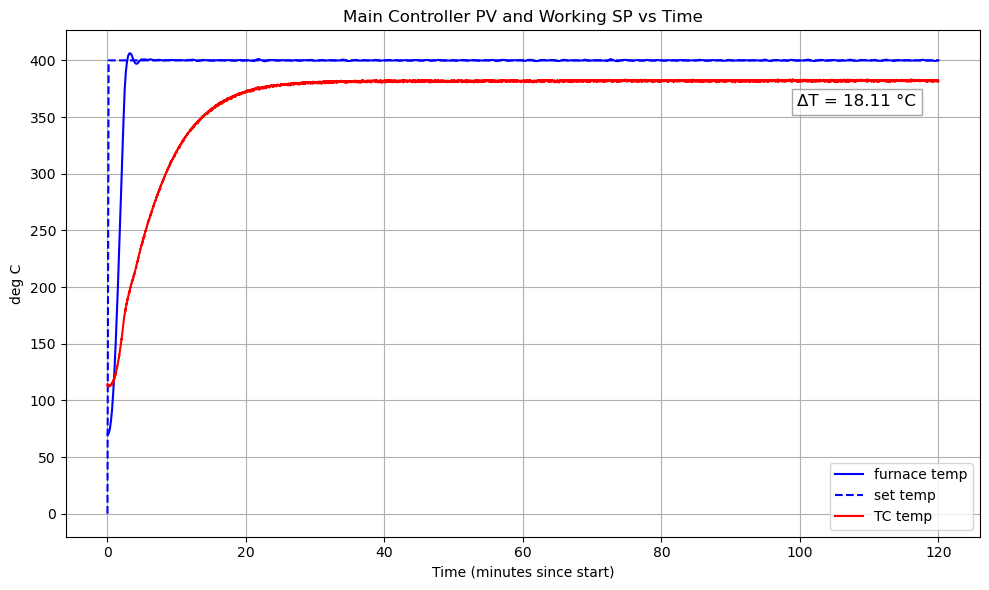

In [34]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes5, df5['Main_Controller_PV'], color='blue', linestyle='-', label='furnace temp')
plt.plot(time_minutes5, df5['Main_Controller_Working_SP'], color='blue', linestyle='--', label='set temp')
plt.plot(t_TC5/60, TC_temp_C5, color='red', linestyle='-', label='TC temp')

delta_T = abs(np.mean(TC_temp_C5[int(len(TC_temp_C5)/4):]) - df5['Main_Controller_PV'].iloc[-1])

plt.text(
    0.80, 0.85,
    f"ΔT = {delta_T:.2f} °C",
    transform=plt.gca().transAxes,
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

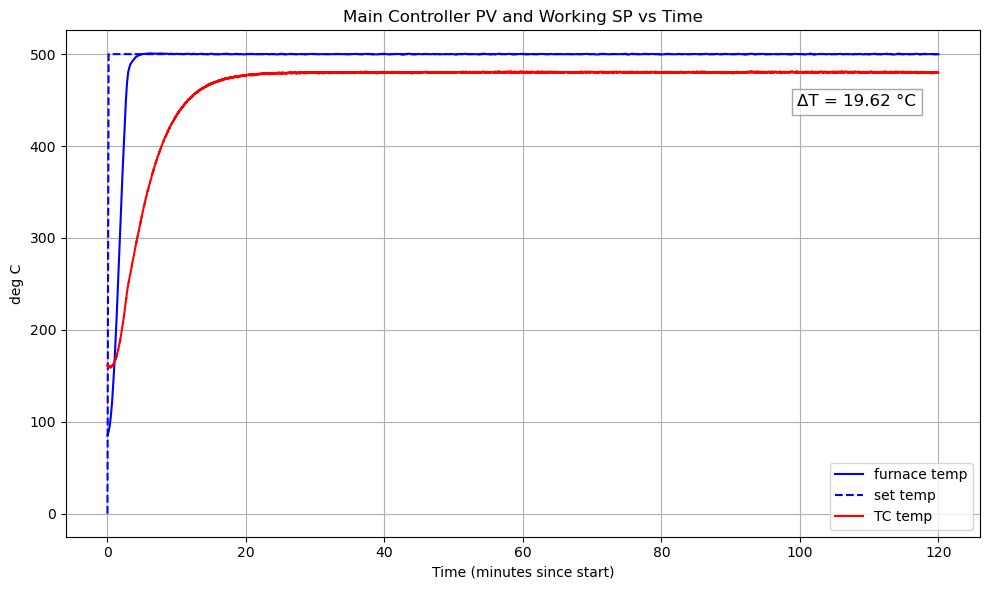

In [36]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_minutes6, df6['Main_Controller_PV'], color='blue', linestyle='-', label='furnace temp')
plt.plot(time_minutes6, df6['Main_Controller_Working_SP'], color='blue', linestyle='--', label='set temp')
plt.plot(t_TC6/60, TC_temp_C6, color='red', linestyle='-', label='TC temp')

delta_T = abs(np.mean(TC_temp_C6[int(len(TC_temp_C6)/4):]) - df6['Main_Controller_PV'].iloc[-1])

plt.text(
    0.80, 0.85,
    f"ΔT = {delta_T:.2f} °C",
    transform=plt.gca().transAxes,
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.xlabel('Time (minutes since start)')
plt.ylabel('deg C')
plt.title('Main Controller PV and Working SP vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()